# 1a. Aproximacion a la funcion 3sen(pi x)

In [10]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam 

from matplotlib import pyplot as plt 
import numpy as np 
import math

In [31]:
#HERENCIA, se crea una clase a partir de otra clase, esta nueva clase contiene todo lo de la antigua clase.
#1a seno
class ODEsolver(Sequential): 
    def __init__(self, **kwargs): 
        super().__init__(**kwargs) #usamos el init de la clase Sequential
        self.loss_tracker = keras.metrics.Mean(name="loss") #funcion de costo
    
    @property 
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data): #paso de entrenamiento
        
        batch_size = tf.shape(data)[0]
        
        #vector de numeros aleatorios
        x = tf.random.uniform((batch_size, 1), minval = -2, maxval = 2)
        
        
        #GradientTape es la funcion que calcula derivadas
        with tf.GradientTape() as tape:
            with tf.GradientTape() as tape2:
                tape2.watch(x) #vigila todas las operaciones que se hacen con la variable x
                y_pred = self(x, training = True) #evalua la derivada de cada valor de x
            
            dy = tape2.gradient(y_pred, x)
            
            #vectores de ceros
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)
            
            x_1 = tf.ones((batch_size, 1))
            y_1 = self(x_1, training = True)

            x_2 = tf.ones((batch_size, 1))/2
            y_pi_2 = self(x_2, training = True)
            
            x_m_1 = -tf.ones((batch_size, 1))
            y_m_1 = self(x_m_1, training = True)

            x_m_2 = -tf.ones((batch_size, 1))/2
            y_m_pi_2 = self(x_m_2, training = True)
            #funcion de costo, la funcion 3sen(pi x)
            eq = y_pred-3*tf.sin(math.pi*x)
            
            #Agregamos algunas condiciones iniciales
            ic_0 = y_o -0.
            ic_1 = y_1 - 0. 
            ic_m_1 = y_m_1 - 0. 
            ic_2 = y_pi_2 - 3.
            ic_m_2 = 3. + y_m_pi_2  
            
            #queremos que el error sea 0 
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic_0) + keras.losses.mean_squared_error(0., ic_1) + keras.losses.mean_squared_error(0., ic_m_1)+ keras.losses.mean_squared_error(0., ic_2) #+ keras.losses.mean_squared_error(0., ic_m_2)
    
    #como cambia la funcion de costo, por ende, el loss, si cambian las trainable_variables (asi se llaman, ya estan definidas en la clase Sequential)
    #gradientes
        grads =tape.gradient(loss, self.trainable_variables)
    
    #muevete en direccion contraria a los gradientes, tiene como argumento el gradiente y su correspondiente variable
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    
    #guarda un historial de la perdida de la funcion de costo
        self.loss_tracker.update_state(loss)
    
    #imprime el historial de la funcion de costo 
        return  {"loss": self.loss_tracker.result()}
            
            

In [32]:
model = ODEsolver()

model.add(Dense(10, activation = "tanh", input_shape = (1, ) ))
model.add(Dense(1, activation = "tanh"))
model.add(Dense(1, activation ="linear"))


model.summary()
model.compile(optimizer =RMSprop(), metrics = ["loss"])


Model: "od_esolver_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [33]:
x = tf.linspace(-1, 1, 100) 
history = model.fit(x, epochs = 500, verbose =1) 

#dominio 
x_testv = tf.linspace(-1, 1, 100)

a = model.predict(x_testv)



Epoch 1/500
4/4 [==============================] - 2s 1ms/step - loss: 12.6942
Epoch 2/500
4/4 [==============================] - 0s 998us/step - loss: 13.3399
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 12.7533
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 12.7906
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 12.4613
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 12.3851
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 12.2737
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 11.7231
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 11.5566
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 11.9584
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 12.4461
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 12.5799
Epoch 13/500
4/4 [=============================

4/4 [==============================] - 0s 2ms/step - loss: 10.1769
Epoch 104/500
4/4 [==============================] - 0s 2ms/step - loss: 10.7260
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 10.1005
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 10.1433
Epoch 107/500
4/4 [==============================] - 0s 1ms/step - loss: 10.7854
Epoch 108/500
4/4 [==============================] - 0s 3ms/step - loss: 10.2257
Epoch 109/500
4/4 [==============================] - 0s 3ms/step - loss: 10.0426
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 10.5592
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 10.5930
Epoch 112/500
4/4 [==============================] - 0s 1ms/step - loss: 9.5722
Epoch 113/500
4/4 [==============================] - 0s 1ms/step - loss: 9.3557
Epoch 114/500
4/4 [==============================] - 0s 3ms/step - loss: 10.1186
Epoch 115/500
4/4 [=========================

4/4 [==============================] - 0s 1ms/step - loss: 8.0983
Epoch 206/500
4/4 [==============================] - 0s 1ms/step - loss: 8.0441
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 7.8070
Epoch 208/500
4/4 [==============================] - 0s 1ms/step - loss: 8.1547
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 7.6529
Epoch 210/500
4/4 [==============================] - 0s 997us/step - loss: 8.5545
Epoch 211/500
4/4 [==============================] - 0s 2ms/step - loss: 7.9614
Epoch 212/500
4/4 [==============================] - 0s 1ms/step - loss: 7.2209
Epoch 213/500
4/4 [==============================] - 0s 997us/step - loss: 7.9639
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 7.4340
Epoch 215/500
4/4 [==============================] - 0s 1ms/step - loss: 7.6484
Epoch 216/500
4/4 [==============================] - 0s 2ms/step - loss: 7.6745
Epoch 217/500
4/4 [==============================]

4/4 [==============================] - 0s 2ms/step - loss: 4.7747
Epoch 308/500
4/4 [==============================] - 0s 998us/step - loss: 4.4048
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 4.7877
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 4.3969
Epoch 311/500
4/4 [==============================] - 0s 1ms/step - loss: 4.6074
Epoch 312/500
4/4 [==============================] - 0s 1ms/step - loss: 4.6451
Epoch 313/500
4/4 [==============================] - 0s 1ms/step - loss: 4.5537
Epoch 314/500
4/4 [==============================] - 0s 3ms/step - loss: 4.5415
Epoch 315/500
4/4 [==============================] - 0s 2ms/step - loss: 4.4824
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6995
Epoch 317/500
4/4 [==============================] - 0s 2ms/step - loss: 4.3848
Epoch 318/500
4/4 [==============================] - 0s 2ms/step - loss: 4.2551
Epoch 319/500
4/4 [==============================] -

4/4 [==============================] - 0s 2ms/step - loss: 1.6536
Epoch 410/500
4/4 [==============================] - 0s 2ms/step - loss: 1.9576
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 1.9514
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 1.8618
Epoch 413/500
4/4 [==============================] - 0s 3ms/step - loss: 1.7632
Epoch 414/500
4/4 [==============================] - 0s 1ms/step - loss: 1.6809
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 1.7996
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 1.5869
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 1.8901
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 1.5432
Epoch 419/500
4/4 [==============================] - 0s 1ms/step - loss: 1.4722
Epoch 420/500
4/4 [==============================] - 0s 3ms/step - loss: 1.5506
Epoch 421/500
4/4 [==============================] - 0

In [ ]:
#model.save("rna_edo_solver1")

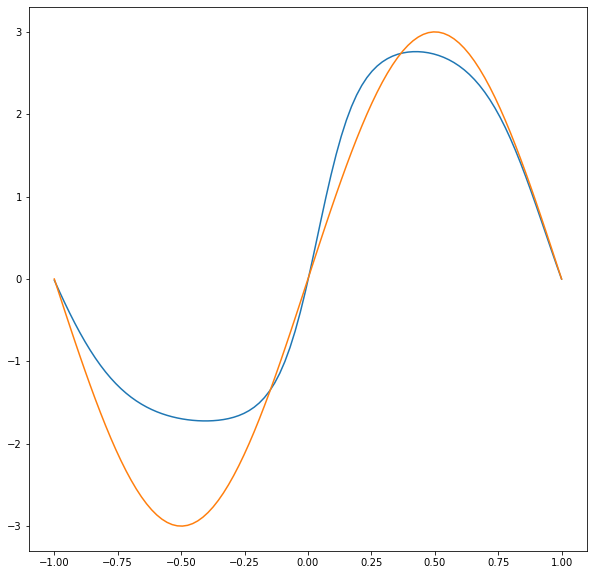

In [34]:
plt.figure(figsize = (10,10))

plt.plot(x_testv, a)
plt.plot(x_testv, 3*np.sin(math.pi*x))

plt.show()
